In [1]:
from keras.models import Sequential
from keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Obtaining Data

In [2]:
train_data=pd.read_csv('train.csv')

In [3]:
test_data=pd.read_csv('test.csv')

In [4]:
train_data.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [5]:
test_data.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [6]:
train_id=list(train_data['ID'])

In [7]:
train_id[:5]

['377.jpg', '17814.jpg', '21283.jpg', '16496.jpg', '4487.jpg']

In [8]:
test_id=list(test_data['ID'])

In [9]:
test_id[:5]

['25321.jpg', '989.jpg', '19277.jpg', '13093.jpg', '5367.jpg']

In [10]:
train_labels=list(train_data['Class'])

In [11]:
train_labels[:5]

['MIDDLE', 'YOUNG', 'MIDDLE', 'YOUNG', 'MIDDLE']

## Directory Seperation

In [12]:
import os,shutil

In [13]:
original_dir='/home/acsrikar/Desktop/Age Detection'
base_dir='/home/acsrikar/Desktop/Augmented'
os.mkdir(base_dir)

In [14]:
train_dir=os.path.join(base_dir,'Train')
os.mkdir(train_dir)
test_dir=os.path.join(base_dir,'Test')
os.mkdir(test_dir)

In [15]:
train_young_dir=os.path.join(train_dir,'YOUNG')
os.mkdir(train_young_dir)
train_middle_dir=os.path.join(train_dir,'MIDDLE')
os.mkdir(train_middle_dir)
train_old_dir=os.path.join(train_dir,'OLD')
os.mkdir(train_old_dir)

In [17]:
originial_dir_train='/home/acsrikar/Desktop/Train'
for i in range(len(train_id)):
    if train_labels[i]=='YOUNG':
        src=os.path.join(originial_dir_train,train_id[i])
        dst=os.path.join(train_young_dir,train_id[i])
        shutil.copyfile(src,dst)
    elif train_labels[i]=='MIDDLE':
        src=os.path.join(originial_dir_train,train_id[i])
        dst=os.path.join(train_middle_dir,train_id[i])
        shutil.copyfile(src,dst)
    elif train_labels[i]=='OLD':
        src=os.path.join(originial_dir_train,train_id[i])
        dst=os.path.join(train_old_dir,train_id[i])
        shutil.copyfile(src,dst)

In [18]:
len(os.listdir(train_old_dir))

2396

In [19]:
len(os.listdir(train_middle_dir))

10804

In [20]:
len(os.listdir(train_young_dir))

6706

## Model Selection

In [21]:
model=Sequential()

In [22]:
model.add(layers.InputLayer(input_shape=(48,48,3)))

In [23]:
model.add(layers.Conv2D(128,(5,5),activation='relu',input_shape=(48,48,3)))

In [24]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [25]:
model.add(layers.Dropout(0.25))

In [26]:
model.add(layers.Conv2D(128,(3,3),activation='relu'))

In [27]:
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [28]:
model.add(layers.Dropout(0.5))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 128)       9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 128)       0         
Total para

In [31]:
model.add(layers.Flatten())

In [32]:
model.add(layers.Dense(256,activation='relu'))

In [33]:
model.add(layers.Dense(128,activation='relu'))

In [34]:
model.add(layers.Dense(3,activation='softmax'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 128)       9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 128)       0         
__________

In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

## Augmentation

In [37]:
from keras.preprocessing.image import ImageDataGenerator

In [38]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(48, 48),
        batch_size=512,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 19906 images belonging to 3 classes.


In [39]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (512, 48, 48, 3)
labels batch shape: (512, 3)


In [40]:
hist=model.fit_generator(
      train_generator,
    steps_per_epoch=39,
      epochs=50)

Epoch 1/50
39/39 [==============================] - 11s 272ms/step - loss: 0.9747 - acc: 0.5282
Epoch 2/50
39/39 [==============================] - 6s 155ms/step - loss: 0.8667 - acc: 0.5928
Epoch 3/50
39/39 [==============================] - 6s 156ms/step - loss: 0.7863 - acc: 0.6496
Epoch 4/50
39/39 [==============================] - 6s 157ms/step - loss: 0.7438 - acc: 0.6725
Epoch 5/50
39/39 [==============================] - 6s 156ms/step - loss: 0.7059 - acc: 0.6874
Epoch 6/50
39/39 [==============================] - 6s 157ms/step - loss: 0.6805 - acc: 0.7019
Epoch 7/50
39/39 [==============================] - 6s 155ms/step - loss: 0.6491 - acc: 0.7182
Epoch 8/50
39/39 [==============================] - 6s 155ms/step - loss: 0.6255 - acc: 0.7340
Epoch 9/50
39/39 [==============================] - 6s 154ms/step - loss: 0.6005 - acc: 0.7429
Epoch 10/50
39/39 [==============================] - 6s 161ms/step - loss: 0.5793 - acc: 0.7542
Epoch 11/50
39/39 [=============================

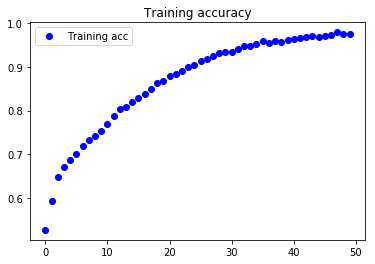

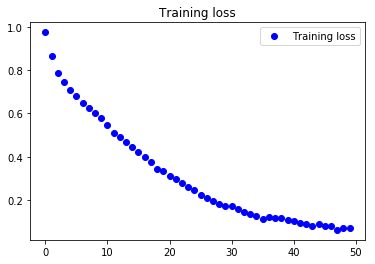

In [41]:
import matplotlib.pyplot as plt

acc = hist.history['acc']
loss = hist.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48, 48),
        batch_size=512,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=39,
      epochs=300)

Found 19906 images belonging to 3 classes.
Epoch 1/300
39/39 [==============================] - 19s 482ms/step - loss: 1.0244 - acc: 0.5613
Epoch 2/300
39/39 [==============================] - 17s 428ms/step - loss: 0.8521 - acc: 0.5997
Epoch 3/300
39/39 [==============================] - 18s 473ms/step - loss: 0.8183 - acc: 0.6235
Epoch 4/300
39/39 [==============================] - 18s 463ms/step - loss: 0.7912 - acc: 0.6418
Epoch 5/300
39/39 [==============================] - 17s 423ms/step - loss: 0.7694 - acc: 0.6506
Epoch 6/300
39/39 [==============================] - 17s 444ms/step - loss: 0.7487 - acc: 0.6605
Epoch 7/300
39/39 [==============================] - 17s 445ms/step - loss: 0.7295 - acc: 0.6752
Epoch 8/300
39/39 [==============================] - 17s 445ms/step - loss: 0.7185 - acc: 0.6822
Epoch 9/300
39/39 [==============================] - 16s 421ms/step - loss: 0.7040 - acc: 0.6881
Epoch 10/300
39/39 [==============================] - 17s 424ms/step - loss: 0.6951 

39/39 [==============================] - 17s 434ms/step - loss: 0.4852 - acc: 0.8007
Epoch 85/300
39/39 [==============================] - 17s 436ms/step - loss: 0.4784 - acc: 0.8016
Epoch 86/300
39/39 [==============================] - 17s 431ms/step - loss: 0.4740 - acc: 0.8061
Epoch 87/300
39/39 [==============================] - 17s 426ms/step - loss: 0.4872 - acc: 0.7987
Epoch 88/300
39/39 [==============================] - 18s 459ms/step - loss: 0.4896 - acc: 0.7943
Epoch 89/300
39/39 [==============================] - 17s 432ms/step - loss: 0.4788 - acc: 0.8027
Epoch 90/300
39/39 [==============================] - 16s 403ms/step - loss: 0.4791 - acc: 0.8021
Epoch 91/300
39/39 [==============================] - 17s 425ms/step - loss: 0.4734 - acc: 0.8078
Epoch 92/300
39/39 [==============================] - 16s 412ms/step - loss: 0.4775 - acc: 0.8017
Epoch 93/300
39/39 [==============================] - 16s 420ms/step - loss: 0.4711 - acc: 0.8069
Epoch 94/300
39/39 [=============

39/39 [==============================] - 18s 462ms/step - loss: 0.3980 - acc: 0.8393
Epoch 168/300
39/39 [==============================] - 18s 455ms/step - loss: 0.3964 - acc: 0.8378
Epoch 169/300
39/39 [==============================] - 17s 446ms/step - loss: 0.3902 - acc: 0.8411
Epoch 170/300
39/39 [==============================] - 17s 436ms/step - loss: 0.3924 - acc: 0.8413
Epoch 171/300
39/39 [==============================] - 17s 424ms/step - loss: 0.3912 - acc: 0.8415
Epoch 172/300
39/39 [==============================] - 18s 458ms/step - loss: 0.3933 - acc: 0.8403
Epoch 173/300
39/39 [==============================] - 17s 441ms/step - loss: 0.4019 - acc: 0.8391
Epoch 174/300
39/39 [==============================] - 18s 470ms/step - loss: 0.3889 - acc: 0.8434
Epoch 175/300
39/39 [==============================] - 17s 439ms/step - loss: 0.3868 - acc: 0.8434
Epoch 176/300
39/39 [==============================] - 17s 427ms/step - loss: 0.3821 - acc: 0.8426
Epoch 177/300
39/39 [===

39/39 [==============================] - 17s 436ms/step - loss: 0.3492 - acc: 0.8615
Epoch 250/300
39/39 [==============================] - 17s 425ms/step - loss: 0.3458 - acc: 0.8573
Epoch 251/300
39/39 [==============================] - 17s 436ms/step - loss: 0.3457 - acc: 0.8617
Epoch 252/300
39/39 [==============================] - 16s 409ms/step - loss: 0.3407 - acc: 0.8620
Epoch 253/300
39/39 [==============================] - 17s 440ms/step - loss: 0.3454 - acc: 0.8586
Epoch 254/300
39/39 [==============================] - 17s 430ms/step - loss: 0.3522 - acc: 0.8571
Epoch 255/300
39/39 [==============================] - 17s 426ms/step - loss: 0.3437 - acc: 0.8605
Epoch 256/300
39/39 [==============================] - 16s 410ms/step - loss: 0.3457 - acc: 0.8611
Epoch 257/300
39/39 [==============================] - 16s 418ms/step - loss: 0.3366 - acc: 0.8663
Epoch 258/300
39/39 [==============================] - 17s 437ms/step - loss: 0.3548 - acc: 0.8578
Epoch 259/300
39/39 [===

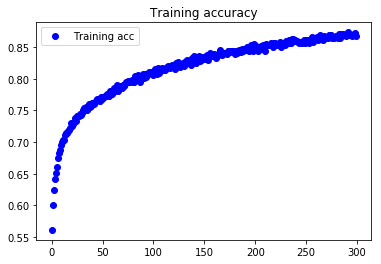

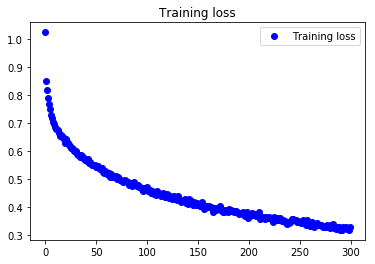

In [43]:
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()

## Getting Images

In [44]:
from keras.preprocessing.image import load_img
from keras.preprocessing import image

In [45]:
def gettingImages(id,path):
    sample_array=[]
    for i in range(len(id)):
        img_path=path+id[i]
        img=load_img(img_path,target_size=(48,48))
        sample_array.append(image.img_to_array(img))
    return sample_array
        

In [46]:

test_features=gettingImages(test_id,'Test/')

In [47]:

test_features=np.array(test_features)

In [48]:

test_features=test_features/255

## Categorical Conversion

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
import keras

In [51]:
lb=LabelEncoder()

In [52]:
train_label_sample=keras.utils.np_utils.to_categorical(lb.fit_transform(train_labels))

In [53]:
train_label_sample[:10]

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

## Model Fitting

In [54]:
predict=model.predict_classes(test_features)

In [55]:
predict

array([1, 2, 2, ..., 0, 0, 2])

In [56]:
answers=lb.inverse_transform(predict)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [57]:
answers

array(['OLD', 'YOUNG', 'YOUNG', ..., 'MIDDLE', 'MIDDLE', 'YOUNG'],
      dtype='<U6')

In [58]:
import pandas as pd

In [59]:
df1=pd.DataFrame(test_id,columns=['ID'])

In [60]:
df2=pd.DataFrame(answers,columns=['Class'])

In [61]:
output=pd.concat([df1,df2],axis=1)

In [62]:
output.to_csv('output3.csv',index=False)

In [63]:
output.head()

,ID,Class
0,25321.jpg,OLD
1,989.jpg,YOUNG
2,19277.jpg,YOUNG
3,13093.jpg,MIDDLE
4,5367.jpg,MIDDLE
